<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-Files" data-toc-modified-id="Working-with-Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with Files</a></span></li><li><span><a href="#Plotting-Basics" data-toc-modified-id="Plotting-Basics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Basics</a></span></li><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary Stats</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Question 5</a></span></li></ul></li><li><span><a href="#Basics-of-Probability" data-toc-modified-id="Basics-of-Probability-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basics of Probability</a></span><ul class="toc-item"><li><span><a href="#Drill-1" data-toc-modified-id="Drill-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drill 1</a></span></li><li><span><a href="#Drill-2" data-toc-modified-id="Drill-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Drill 2</a></span></li></ul></li><li><span><a href="#Data-distributions-normal-and-otherwise" data-toc-modified-id="Data-distributions-normal-and-otherwise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data distributions normal and otherwise</a></span><ul class="toc-item"><li><span><a href="#6-Distributions" data-toc-modified-id="6-Distributions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>6 Distributions</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Question 2</a></span></li></ul></li></ul></li><li><span><a href="#Sampling-and-the-Central-Limit-Theorem" data-toc-modified-id="Sampling-and-the-Central-Limit-Theorem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sampling and the Central Limit Theorem</a></span></li><li><span><a href="#Evaluating-data-sources" data-toc-modified-id="Evaluating-data-sources-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating data sources</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></li><li><span><a href="#Sampling/Central-Theorem" data-toc-modified-id="Sampling/Central-Theorem-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sampling/Central Theorem</a></span><ul class="toc-item"><li><span><a href="#Assignments" data-toc-modified-id="Assignments-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Assignments</a></span></li></ul></li></ul></div>

# Working with Files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import statistics
import re
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
#purchases = pd.read_csv('purchases.csv')
#purchases.to_csv('test.csv')

#j_purchases = pd.read_json('purchases.json')
#j_purchases.to_json('json_purchases.json')
lines = []
with open('purchases.csv') as purchases:
    purchases = purchases.readline()
    for line in purchases:
        lines.append(line)
#"".join(lines)



# Plotting Basics

Let's go out into the world and generate some beautiful visuals. Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

In [4]:
#import data
df = pd.read_csv('planecrashinfo_20181121001952.csv')


In [5]:
#explore

#df.head()
#df.describe()
len(df)

5783

In [6]:

#drop irrelevant colomns
columns_drop = ['flight_no', 'ac_type', 'registration', 
                'cn_ln', 'aboard', 'ground', 'summary']

df.drop(columns = columns_drop, inplace = True)

#keep top 10 freq crash locations
locations = []
freq_loc = []
cnt_loc = Counter(df['location'])
common_loc = cnt_loc.most_common(10)
for key, value in common_loc:
    locations.append(key)
    freq_loc.append(value)
loc_df = df[df['location'].isin(locations)]


In [7]:
df['total_fatalities'] = [i.split()[0]for i in df['fatalities']]

#create column of only integer months
df['month_date_num'] = [i.split(' ')[0] for i in df['date']]

months = {'January': 1,
'February': 2,
'March': 3,
'April': 4,
'May': 5,
'June': 6,
'July': 7,
'August': 8,
'September': 9,
'October': 10,
'November': 11,
'December': 12}

df['month_date_num'] = [months[i] for i in df['month_date_num']]

In [8]:
df.loc[filt2, 'time']

NameError: name 'filt2' is not defined

In [ ]:
df = df[df.time != '?'].copy()
df['clean_time'] = df.time.str.lstrip('c ').str.lstrip('c ').str.rstrip('Z').str.lstrip('c:').str.lstrip('C ').str.lstrip('d ')

filt = df.clean_time.str.len() > 5
df.loc[filt, 'clean_time'] = df[filt]['clean_time'].apply(lambda x: x[1:])

filt = df.clean_time.str.len() == 4
df.loc[filt, 'clean_time'] = df[filt]['clean_time'].apply(lambda x: x[:2] + ':' + x[2:] if ':' not in x else x)
df.loc[filt, 'clean_time'] = df[filt]['clean_time'].apply(lambda x: '0' + x if x[1] == ':' else x)

filt = df.clean_time.apply(lambda x: x[1] == ':')
df.loc[filt, 'clean_time'] = df[filt]['clean_time'].apply(lambda x: '0'+ x[:-1])

df['clean_time'] = df.clean_time.apply(lambda x: int(x[:2]) + int(x[3:]) / 60)
df['total_fatalities'] = df.total_fatalities.astype(int)


In [ ]:
top_operators = list(df.operator.value_counts().keys()[:10])
operators_freq = list(df.operator.value_counts().values[:10])
top_operators = dict(zip( top_operators, operators_freq))

In [ ]:
#explore data

plt.figure(figsize=(20,10))
#
plt.subplot(2,2,1)
x = np.arange(0,20,2)
plt.barh(locations, freq_loc)
plt.xticks(x)
plt.xlabel('Total Crashes')
plt.ylabel('Location')
plt.title('Top 10 Plane Crash Locations')

#year to fatalities
plt.subplot(2,2,2)
plt.scatter(df['clean_time'], df['total_fatalities'], alpha= .2)
plt.title('Times of Plane Crashes')
x = np.arange(1, 23.59, 1)
plt.xticks(x)
plt.yscale("log")
plt.ylim([1,1000])
plt.xlabel('Time (Military)')
# or ylabel can be just "Fatalities"?
plt.ylabel('Fatalities')

#Pct of Operators
plt.subplot(2,2,3)
plt.pie(top_operators.values(), labels = top_operators.keys())
plt.title('Operators with most Crashes')

plt.show()


2-3 sentences description

# Summary Stats

In [ ]:
kids = {'greg': 14,
        'marcia': 12,
        'peter': 11,
        'jan': 10,
        'bobby': 8,
        'cindy': 6,
        'oliver': 8}
df = pd.DataFrame()
df['names'] = kids.keys()
df['age'] = kids.values()
df.describe()

## Question 1 

1. Greg was 14, Marcia was 12, Peter was 11, Jan was 10, Bobby was 8, and Cindy was 6 when they started playing the Brady kids on The Brady Bunch.  Cousin Oliver was 8 years old when he joined the show. What are the mean, median, and mode of the kids' ages when they first appeared on the show? What are the variance, standard deviation, and standard error?

In [ ]:
mean = np.mean(df)
median = np.median(df['age'])
mode = statistics.mode(df['age'])
var = np.var(df)
std = np.std(df, ddof=1)
stand_error = std / np.sqrt(len(df))
stand_error

## Question 2

2. Using these estimates, if you had to choose only one estimate of central tendency and one estimate of variance to describe the data, which would you pick and why?

I would choose the mean as the best measurement to describe the data. Since the dataset is very small it not beneficial to use the mode or median. As for variance, I would use the std since it will give insight on the age range of the data. Since the std is quite small, we can assume that the range of ages will be small too. The standard error wouldn't be beneficial since there is no uncertainty with the data. 

## Question 3
3. Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

In [ ]:
#change cindy's age
df.loc[5,'age'] = 9
df.describe()

In [ ]:
mean = np.mean(df)
median = np.median(df['age'])
mode = statistics.mode(df['age'])
var = np.var(df)
std = np.std(df, ddof=1)
stand_error = std / np.sqrt(len(df))
stand_error

The mean increased by around .5, std decreased by .5, standard error decreased by .1. The mode and median remained the same. 

## Question 4
4. Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again.  Does this change your choice of central tendency or variance estimation methods?

In [ ]:
df.loc[6, 'names'] = 'Jessica'
df.loc[6, 'age'] = '1'
#why does the describe attr change? 
df.describe()

## Question 5
5. On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show.  The answers were:
    TV Guide            20% fans
    Entertainment Weekly    23% fans
    Pop Culture Today       17% fans
    SciPhi Phanatic     5% fans

 Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

In [ ]:
answer = np.mean([23, 20, 17])
answer

I actually didn't know what the Brady Bunch were so after I found out they were a sitcom, I realized that the SciPhi Phanatic community doesn't represent the population and is probably more biased. The other 3 probably represent the general population alot better. Knowing that, I took the average of the three and I would estimate that 20% of the adult Americans were fans of anniversary show. 

# Basics of Probability

## Drill 1

Calculate the probability of flipping a balanced coin four times and getting each pattern: HTTH, HHHH and TTHH.
If a list of people has 24 women and 21 men, then the probability of choosing a man from the list is 21/45. What is the probability of not choosing a man?
The probability that Bernice will travel by plane sometime in the next year is 10%. The probability of a plane crash at any time is .005%. What is the probability that Bernice will be in a plane crash sometime in the next year?
A data scientist wants to study the behavior of users on the company website. Each time a user clicks on a link on the website, there is a 5% chance that the user will be asked to complete a short survey about their behavior on the website. The data scientist uses the survey data to conclude that, on average, users spend 15 minutes surfing the company website before moving on to other things. What is wrong with this conclusion?
When you're done, the solution for this drillset can be found here.

In [ ]:
#1
prob_h_t = .50
htth = prob_h_t * prob_h_t * prob_h_t * prob_h_t
answer = htth
#since the prob are indep, HHHH and TTHH = 0.0625 too

#2 
total = 24 + 21
answer = (45 - 21) / total

#3 
prob_travel = .10
prob_crash = .005
answer = prob_travel * prob_crash
answer

#4 
prob_ask_survey = .05
# biased towards users who use the website more and ultimately click more links.
#since the likelihood of being asked increases everytime they click a link

## Drill 2

Drill set 2
Now it's time to use Bayes' rule to compute some conditional probabilities. First look over the numbers and estimate each of the four probabilities, using your intuition. Then, calculate the probabilities using Bayes' rule. Keep track of your work in a Google document or markdown file that you can share with your mentor.

A diagnostic test has a 98% probability of giving a positive result when applied to a person suffering from Thripshaw's Disease, and 10% probability of giving a (false) positive when applied to a non-sufferer. It is estimated that 0.5 % of the population are sufferers. Suppose that the test is now administered to a person whose disease status is unknown. Calculate the probability that the test will:

Be positive 

Correctly diagnose a sufferer of Thripshaw's

Correctly identify a non-sufferer of Thripshaw's

Misclassify the person

Bayes:
P(A | B) = P(B | A) * P(A) / P(B)
 
P(B | A) = prob of B (negative) given results A (false negative prob)

P(A) = prob of A (prob of having disease (true positive prob)

P(B) = prob B (prob of not having disease (true negative)

In [ ]:
#typo in instructions .5 = .05
.05 * .98 * .01

# Data distributions normal and otherwise

To complete the following drills, you'll need to use your Python skills to create some datasets, then use your new statistical knowledge to summarize them. Choose 6 distributions from the list of random distributions available in NumPy, called “Distributions”

For each distribution:

Generate a random variable with 100 datapoints using the code distributionvar = np.random.distributionname([arguments], 100), replacing distributionvar with an appropriate variable name and distributionname with the name of the distribution you’ve chosen, and filling in the empty space in the parentheses with your chosen values for the appropriate parameters. If you feel uncertain about how to do this, go back to the “Other Distributions” assignment for examples of code to use as a starting point.

Graph the variable using a histogram.

Compute the mean and standard deviation and plot them as vertical lines on the histogram.

Evaluate whether the descriptive statistics provided useful information about the variable. Can you identify any common characteristics of the distributions that could be usefully described using the mean and/or standard deviation, versus the ones that could not?

Additionally:

Generate two normally-distributed variables, one with a mean of 5 and standard deviation of 0.5, and the other with a mean of 10 and standard deviation of 1.

Add them together to create a third variable.

Graph the third variable using a histogram.

Compute the mean and standard deviation and plot them as vertical lines on the histogram.

Evaluate the descriptive statistics against the data.


## 6 Distributions

In [ ]:
normal = np.random.normal(loc = 0, scale = 1, size= 100)
binormal = np.random.binomial(2, .5, size= 100)
poisson = np.random.poisson(lam = 1, size= 100)
gamma = np.random.gamma(8,1, size= 100)
uniform = np.random.uniform(-2, 5, size= 100)
beta = np.random.beta(6,2, 100)

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.hist(normal)
plt.title('Normal')
plt.axvline(normal.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(normal.std(), color='b', linestyle='dotted', linewidth=2)

plt.subplot(3,3,2)
plt.hist(binormal)
plt.title('Binormal')
plt.axvline(binormal.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(binormal.std(), color='b', linestyle='dotted', linewidth=2)

plt.subplot(3,3,3)
plt.hist(poisson)
plt.title('Poisson')
plt.axvline(poisson.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(poisson.std(), color='b', linestyle='dotted', linewidth=2)

plt.subplot(3,3,4)
plt.hist(gamma)
plt.title('Gamma')
plt.axvline(gamma.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(gamma.std(), color='b', linestyle='dotted', linewidth=2)

plt.subplot(3,3,5)
plt.hist(uniform)
plt.title('Uniform')
plt.axvline(uniform.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(uniform.std(), color='b', linestyle='dotted', linewidth=2)

plt.subplot(3,3,6)
plt.hist(beta)
plt.title('Beta')
plt.axvline(beta.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(beta.std(), color='b', linestyle='dotted', linewidth=2)

plt.show()

### Question 1

Normal: Yes the mean and std accurately represents the data since 50% of the data fall on each side of the mean and the std represents the variance in regards to the mean.

Binormal: Yes the mean be a useful metric since the data is also somewhate evenly distributed on each side. Although the std doesn't represent the variance of the data since the data is discrete and the data is spread out significantly farther than mean.

Poisson: No for both since the data is skewed towards the left side of the mean so the mean and stardard deviation would be discarded. 

Gamma: Yes the mean would be a useful metric since the data is somewhat centered in the middle. The standard deviation would be useful since it helps shows the range of the data in the distribution. 

Common Characteristics: Skewed distributions are more likely to disregard the mean and standard deviation. 

### Question 2

Generate two normally-distributed variables, one with a mean of 5 and standard deviation of 0.5, and the other with a mean of 10 and standard deviation of 1.

Add them together to create a third variable.

Graph the third variable using a histogram.

Compute the mean and standard deviation and plot them as vertical lines on the histogram.

Evaluate the descriptive statistics against the data.

In [ ]:
rand1 = np.random.normal(5, .5, 100)
rand2 = np.random.normal(10, 1, 100)
rand3 = rand1 + rand2


mean1 = rand1.mean()
std1 = rand1.std()

mean2 = rand2.mean()
std2 = rand2.std()

mean3 = rand3.mean()
std3 = rand3.std()
plt.figure(figsize = (10,5))

plt.hist(rand1)
plt.axvline(mean1, color='b', linestyle='solid', linewidth=2)
plt.axvline(mean1 + std1, color='b', linestyle='dotted', linewidth=2)
plt.axvline(mean1 - std1, color='b', linestyle='dotted', linewidth=2)

plt.hist(rand2)
plt.axvline(mean2, color='b', linestyle='solid', linewidth=2)
plt.axvline(mean2 + std2, color='b', linestyle='dotted', linewidth=2)
plt.axvline(mean2 - std2, color='b', linestyle='dotted', linewidth=2)

plt.hist(rand3)
plt.axvline(mean3, color='b', linestyle='solid', linewidth=2)
plt.axvline(mean3 + std3, color='b', linestyle='dotted', linewidth=2)
plt.axvline(mean3 - std3, color='b', linestyle='dotted', linewidth=2)
plt.show()

The rand3 distribution is skewed right slightly since most of the data from the two other distributions were centered below the rand3 mean of 15. 

# Sampling and the Central Limit Theorem

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?



In [ ]:
np.random.seed(30)
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

samp1 = np.random.choice(pop1, 100)
samp2 = np.random.choice(pop2, 100)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


Prediction #1 : (100 samples to 1000)

Increasing the sample size to 1000 will increase the amount of noise within the histogram. The p value will go down since the sample size is increasing and will fit the population more than 100. The t value may decrease since more samples may increase the noises and which could lead to a smaller mean difference between the two samples.

In [ ]:
np.random.seed(30)
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

samp1 = np.random.choice(pop1, 1000)
samp2 = np.random.choice(pop2, 1000)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


Prediction 2: (1000 samples to 20)

After seeing the results of my first prediction, I predict that the t-value will decrease significantly and the p-value will increase slightly compared to the first distribution. The histogram will obviously have less noise than the last one.

In [ ]:
np.random.seed(30)
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

samp1 = np.random.choice(pop1, 20)
samp2 = np.random.choice(pop2, 20)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


Prediction #3: (change pop1 p = .3)
The samples will be somewhat in the middle? Unsure

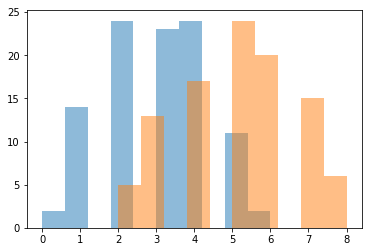

samp1 mean 2.94 ... std 1.355138369318794
samp2 mean 5.1 ... std 1.5716233645501712
standard error 2.1599999999999997
t-value 10.356527555758717 ... p-value 2.7620537128082026e-20


In [10]:
np.random.seed(30)
pop1 = np.random.binomial(10, .3, 10000)
pop2 = np.random.binomial(10, .5, 10000)

samp1 = np.random.choice(pop1, 100)
samp2 = np.random.choice(pop2, 100)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


prediction #4:

Unsure

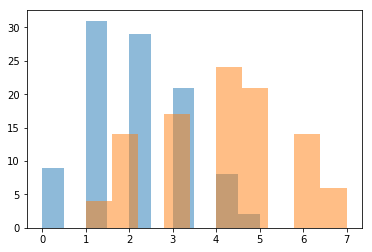

samp1 mean 1.94 ... std 1.1732007500849972
samp2 mean 4.1 ... std 1.5459624833740306
standard error 2.1599999999999997
t-value 11.074092017799543 ... p-value 3.4922477393142123e-22


In [87]:
np.random.seed(30)
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .4, 10000)

samp1 = np.random.choice(pop1, 100)
samp2 = np.random.choice(pop2, 100)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


Change Distribution to Normal:

A normal distribution changed the means to be very similar between the samples. The t-value decreased significantly since the means were very similar. The p-value is still very low which is suprising since the t-value is so low. 

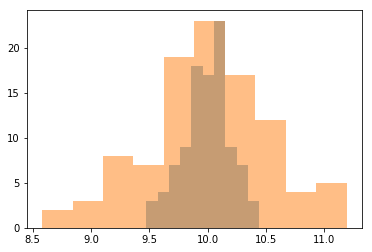

samp1 mean 9.997209120306549 ... std 0.20101746178571464
samp2 mean 9.995891577312921 ... std 0.5288624813612298
standard error -0.0013175429936271854
t-value -0.023170593166821015 ... p-value 0.9815505559028923


In [89]:
np.random.seed(30)
pop1 = np.random.normal(10, .2, 10000)
pop2 = np.random.normal(10, .5, 10000)

samp1 = np.random.choice(pop1, 100)
samp2 = np.random.choice(pop2, 100)

plt.hist(samp1, alpha = .5)
plt.hist(samp2, alpha = .5)
plt.show()

mean1, std1 = samp1.mean(), samp1.std()
mean2, std2 = samp2.mean(), samp2.std()
print('samp1 mean {} ... std {}'.format(mean1, std1))
print('samp2 mean {} ... std {}'.format(mean2, std2))

se = mean2 - mean1
print('standard error {}'.format(se))

t_value, p_value = ttest_ind(samp2, samp1, equal_var=False)
print('t-value {} ... p-value {}'.format(t_value, p_value))


# Evaluating data sources

In each of the scenarios, find possible shortcomings of the theoretical or actual data sources to answer the given question. What could be done to either adjust the analysis or reframe the question so that you can answer it accurately?

## Question 1
Data Source: Amsterdam availability data scraped from AirBnB on December 24th. Question: What are the popular neighborhoods in Amsterdam?

Since Amsterdam celebrates Christmas, the data will be skewed towards neighborhoods that are close to Christmas celebrations or events since 12/24 is Christmas eve. For a more accurate answer, the data source should be a on date that is far away from any culture or social events in Amsterdam. If the question was what are the most popular neighborhoods to celebrate christmas, then the data source would be reasonable. 

## Question 2

Data Source: Mental health services use on September 12, 2001 in San Francisco, CA and New York City, NY. Question: How do patterns of mental health service use vary between cities?

Data source is the day after the tragic 9/11 attack. It was likely that the data is correlated to that event which may lead to more dramtic results that won't represent a general representation of patterns in the mental health services. The data will probably be probably be more skewed in New York since that was where the most damage and fatalities were. Although, one of the planes that was hijacked had bay area victims. 

There may be a chance that the data source may be accurate since the data was the day right after the event. I don't know how I would react if I were a victim's family member but my theory is that most people would not contact mental health services the day after. I would assume they would call maybe a couple to a few days after once they processed the situation and mourned with the rest of their family.


## Question 3

Data Source: Armenian Pub Survey. Question: What are the most common reasons Armenians visit local pubs?

The population could be more specific/categorized. Instead of the data source generalizing Armenians, it should also include the person's age, gender, occupation, financial status, education, family, religion, etc. Providing these features will allow more insight into the reasons why they visit the local pubs. More specific features could be: frequency of going to the pubs, on average how long they stay at the pubs, do they go alone? (could help in finding if the reason is because of some emotional/addiction issue)

# Sampling/Central Theorem

## Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the `pop1` and `pop2` populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with `n` equal to `10` and size equal to `10000`. The p-value of `pop1` should be `0.2` and the p-value of `pop2` should be `0.5`. Using a sample size of `100`, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen.  Discuss the results with your mentor.

 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.  Repeat this again, decreasing the size of your samples to 20.  What values change, and what remain the same?

 2. Change the probability value (`p` in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)) for `pop1` to 0.3, then take new samples and compute the t-statistic and p-value.  Then change the probability value p for group 1 to 0.4, and do it again.  What changes, and why?
 
 3. Change the distribution of your populations from binomial to a distribution of your choice.  Do the sample mean values still accurately represent the population values?

When you've given it a try, you can find a sample solution [here](https://github.com/Thinkful-Ed/data-201-resources/blob/master/solutions/Prep%20course/3.3.7.ipynb).


In [ ]:
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

samp1 = np.random.choice(pop1, 100)
samp2 = np.random.choice(pop2, 100)
m_1 = np.mean(samp1)
m_2 = np.std(samp2)
std_1 = np.mean(samp1)
std_2 = np.std(samp2)



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-Files" data-toc-modified-id="Working-with-Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with Files</a></span></li><li><span><a href="#Plotting-Basics" data-toc-modified-id="Plotting-Basics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Basics</a></span></li><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary Stats</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Question 5</a></span></li></ul></li><li><span><a href="#Basics-of-Probability" data-toc-modified-id="Basics-of-Probability-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basics of Probability</a></span><ul class="toc-item"><li><span><a href="#Drill-1" data-toc-modified-id="Drill-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drill 1</a></span></li><li><span><a href="#Drill-2" data-toc-modified-id="Drill-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Drill 2</a></span></li></ul></li><li><span><a href="#Data-distributions-normal-and-otherwise" data-toc-modified-id="Data-distributions-normal-and-otherwise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data distributions normal and otherwise</a></span><ul class="toc-item"><li><span><a href="#6-Distributions" data-toc-modified-id="6-Distributions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>6 Distributions</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Question 2</a></span></li></ul></li></ul></li><li><span><a href="#Sampling-and-the-Central-Limit-Theorem" data-toc-modified-id="Sampling-and-the-Central-Limit-Theorem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sampling and the Central Limit Theorem</a></span></li><li><span><a href="#Evaluating-data-sources" data-toc-modified-id="Evaluating-data-sources-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating data sources</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></li><li><span><a href="#Sampling/Central-Theorem" data-toc-modified-id="Sampling/Central-Theorem-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sampling/Central Theorem</a></span><ul class="toc-item"><li><span><a href="#Assignments" data-toc-modified-id="Assignments-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Assignments</a></span></li></ul></li></ul></div>